In [268]:
from bs4 import BeautifulSoup  
import requests   


url = "https://en.wikipedia.org/wiki/Forbes_India%27s_richest_Indian_by_year"  
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
response




<Response [200]>

In [338]:

tables = soup.find_all('table')

print( len(tables))


3


In [248]:
if len(tables) > 0:
    
    first_table = tables[0]

    
    headers = first_table.find_all('th')
    
    print([header.text.strip() for header in headers])
else:
    print("No tables found on the webpage.")


['Year', 'Richest', 'Net worth in US$', 'Second richest', 'Net worth in US$', 'Source']


In [249]:

richest = [header.text.strip() for header in headers]


print(richest)


['Year', 'Richest', 'Net worth in US$', 'Second richest', 'Net worth in US$', 'Source']


In [250]:
import pandas as pd

In [254]:
df = pd.DataFrame(columns = richest)

df

,Year,Richest,Net worth in US$,Second richest,Net worth in US$,Source


In [256]:
column_data = first_table.find_all('tr')
column_data

[<tr>
 <th>Year
 </th>
 <th>Richest
 </th>
 <th>Net worth in US$
 </th>
 <th>Second richest
 </th>
 <th>Net worth in US$
 </th>
 <th>Source
 </th></tr>,
 <tr>
 <td>2024
 </td>
 <td><a href="/wiki/Mukesh_Ambani" title="Mukesh Ambani">Mukesh Ambani</a>
 </td>
 <td>124 billion <span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span>
 </td>
 <td><a href="/wiki/Gautam_Adani" title="Gautam Adani">Gautam Adani</a>
 </td>
 <td>83 billion <span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decodi

In [258]:
for row in column_data[1:]:
   
    row_data = row.find_all('td')
   
    individual_row_data = [data.text.strip() for data in row_data]
   
    length = len(df)
   
    df.loc[length] = individual_row_data 

In [260]:
 df

,Year,Richest,Net worth in US$,Second richest,Net worth in US$,Source
0,2024,Mukesh Ambani,124 billion,Gautam Adani,83 billion,[5]
1,2023,Mukesh Ambani,92 billion,Gautam Adani,68 billion,[6]
2,2022,Gautam Adani,150 billion,Mukesh Ambani,88 billion,[7]
3,2021,Mukesh Ambani,92.7 billion,Gautam Adani,74.8 billion,[8]
4,2020,Mukesh Ambani,88.7 billion,Gautam Adani,25.2 billion,[9]
5,2019,Mukesh Ambani,51.4 billion,Gautam Adani,15.7 billion,[10]
6,2018,Mukesh Ambani,47.3 billion,Azim Premji,21 billion,[11]
7,2017,Mukesh Ambani,38 billion,Azim Premji,19 billion,[12]
8,2016,Mukesh Ambani,22.7 billion,Dilip Shanghvi,16.9 billion,[13]
9,2015,Mukesh Ambani,18.9 billion,Dilip Shanghvi,18 billion,[14]


In [123]:
 df.to_csv(r'D:/big data project/Top_richest_new.csv')

## DATA WRANGLING 

In [126]:
import pandas as pd
import numpy as np


In [242]:
## read csv

richest_india=pd.read_csv("D:/big data project/Top_richest_new.csv")
richest_india.head()


,Unnamed: 0,Year,Richest,Net worth in US$,Second richest,Net worth in US$.1,Source
0,0,2024,Mukesh Ambani,124 billion,Gautam Adani,83 billion,[5]
1,1,2023,Mukesh Ambani,92 billion,Gautam Adani,68 billion,[6]
2,2,2022,Gautam Adani,150 billion,Mukesh Ambani,88 billion,[7]
3,3,2021,Mukesh Ambani,92.7 billion,Gautam Adani,74.8 billion,[8]
4,4,2020,Mukesh Ambani,88.7 billion,Gautam Adani,25.2 billion,[9]


In [152]:
# Get an overview of the dataset
print(richest_india.info())

# Display basic statistics for numerical columns
print(richest_india.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          29 non-null     int64 
 1   Year                29 non-null     int64 
 2   Richest             28 non-null     object
 3   Net worth in US$    29 non-null     object
 4   Second richest      29 non-null     object
 5   Net worth in US$.1  29 non-null     object
 6   Source              29 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.7+ KB
None
       Unnamed: 0         Year
count   29.000000    29.000000
mean    14.000000  2010.000000
std      8.514693     8.514693
min      0.000000  1996.000000
25%      7.000000  2003.000000
50%     14.000000  2010.000000
75%     21.000000  2017.000000
max     28.000000  2024.000000


In [154]:
# Check for missing values
print(richest_india.isnull().sum())

Unnamed: 0            0
Year                  0
Richest               1
Net worth in US$      0
Second richest        0
Net worth in US$.1    0
Source                0
dtype: int64


In [162]:
print(richest_india.dtypes)


unnamed:_0             int64
year                   int64
richest               object
net_worth_in_us$      object
second_richest        object
net_worth_in_us$.1    object
source                object
dtype: object


In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
import pandas as pd

# Load the Excel file
file_path = "D:/big data project/Top_richest_new.csv"  # Replace with your Excel file's path
df = pd.read_excel(file_path)

# Drop columns 'A' and 'G' (0-indexed columns)
columns_to_remove = [0, 6]  # Column indices start from 0
df = df.drop(df.columns[columns_to_remove], axis=1)

# Save the modified DataFrame to a new Excel file
output_file_path = "modified_file.xlsx"
df.to_excel(output_file_path, index=False)

print("Columns A and G have been removed. Modified file saved as 'modified_file.xlsx'.")


Columns A and G have been removed. The modified file is saved at: D:/big data project/Top_richest_new_modified.csv


In [178]:
file_path = "D:/big data project/Top_richest_new_modifies.csv"  
df = pd.read_csv(file_path)


df.loc[df['Year'] == 2007, 'Richest'] = 'Lakshmi Mittal'


output_path = "D:/big data project/Top_richest_new_updated.csv"
df.to_csv(output_path, index=False)

print(f"The richest person for 2007 has been updated to 'Lakshmi Mittal'. File saved at: {output_path}")


The richest person for 2007 has been updated to 'Lakshmi Mittal'. File saved at: D:/big data project/Top_richest_new_updated.csv


In [182]:
Database=pd.read_csv("D:/big data project/Top_richest_new_updated.csv")

In [184]:
Database

,Year,Richest,Net worth in US$,Second richest,Net worth in US$.1
0,2024,Mukesh Ambani,124 billion,Gautam Adani,83 billion
1,2023,Mukesh Ambani,92 billion,Gautam Adani,68 billion
2,2022,Gautam Adani,150 billion,Mukesh Ambani,88 billion
3,2021,Mukesh Ambani,92.7 billion,Gautam Adani,74.8 billion
4,2020,Mukesh Ambani,88.7 billion,Gautam Adani,25.2 billion
5,2019,Mukesh Ambani,51.4 billion,Gautam Adani,15.7 billion
6,2018,Mukesh Ambani,47.3 billion,Azim Premji,21 billion
7,2017,Mukesh Ambani,38 billion,Azim Premji,19 billion
8,2016,Mukesh Ambani,22.7 billion,Dilip Shanghvi,16.9 billion
9,2015,Mukesh Ambani,18.9 billion,Dilip Shanghvi,18 billion


In [193]:
import pandas as pd

# Load the CSV file
file_path = "D:/big data project/Top_richest_new_updated.csv"
df = pd.read_csv(file_path)


In [197]:
# Print the existing column names and their count
print(df.columns)
print(f"Number of columns: {len(df.columns)}")


Index(['Year', 'Richest', 'Net worth in US$', 'Second richest',
       'Net worth in US$.1'],
      dtype='object')
Number of columns: 5


Number of years as the richest:
Richest
Mukesh Ambani           16
Lakshmi Mittal           6
Azim Premji              5
Gautam Adani             1
Kumar Mangalam Birla     1
Name: count, dtype: int64

Average net worth of the richest person: 35.83 billion


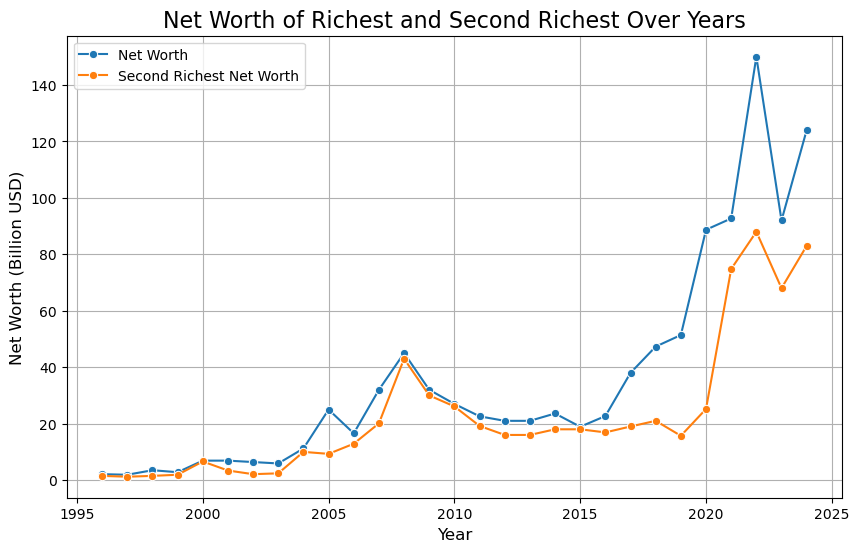

C:\Users\Prachir\AppData\Local\Temp\ipykernel_15020\2001466452.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=richest_count.index, y=richest_count.values, palette='viridis')


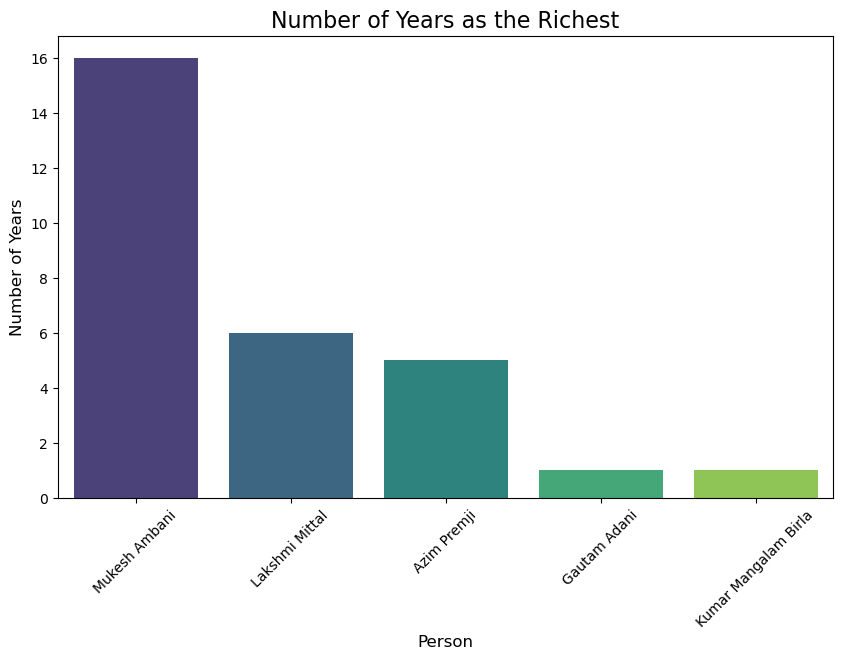

Insights saved to D:/big data project/Richest_Insights.csv


In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
file_path = "D:/big data project/Top_richest_new_updated.csv"
df = pd.read_csv(file_path)

# Step 2: Clean the data
# Rename columns based on the actual column names
df.columns = ['Year', 'Richest', 'NetWorth', 'SecondRichest', 'SecondNetWorth']

# Convert net worth columns to numerical values (e.g., billion -> float)
df['NetWorth'] = df['NetWorth'].str.extract(r'(\d+\.?\d*)').astype(float)
df['SecondNetWorth'] = df['SecondNetWorth'].str.extract(r'(\d+\.?\d*)').astype(float)

## insights 1
richest_count = df['Richest'].value_counts()
print("Number of years as the richest:")
print(richest_count)

# Insight 2: Trends in net worth over the years
average_networth = df['NetWorth'].mean()
print(f"\nAverage net worth of the richest person: {average_networth:.2f} billion")

# Step 4: Create Visualizations
# Visualization 1: Line plot of net worth over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='NetWorth', marker='o', label='Net Worth')
sns.lineplot(data=df, x='Year', y='SecondNetWorth', marker='o', label='Second Richest Net Worth')
plt.title('Net Worth of Richest and Second Richest Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Worth (Billion USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Bar chart for the number of years as the richest
plt.figure(figsize=(10, 6))
sns.barplot(x=richest_count.index, y=richest_count.values, palette='viridis')
plt.title('Number of Years as the Richest', fontsize=16)
plt.xlabel('Person', fontsize=12)
plt.ylabel('Number of Years', fontsize=12)
plt.xticks(rotation=45)
plt.show()

output_path = "D:/big data project/Richest_Insights.csv"
insights.to_csv(output_path, index=False)
print(f"Insights saved to {output_path}")


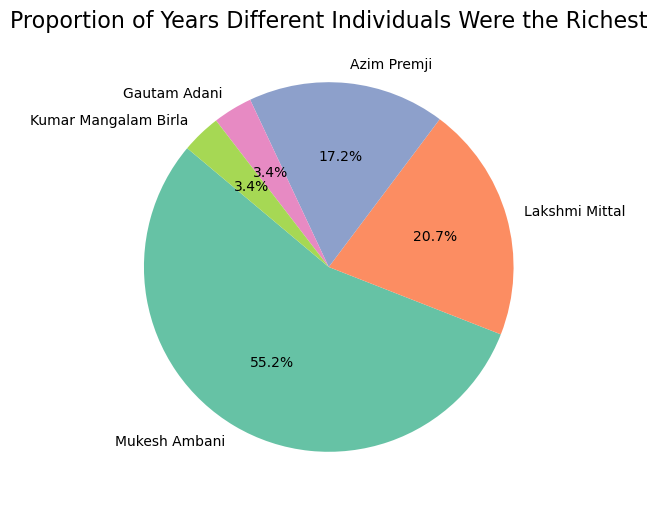

In [203]:
plt.figure(figsize=(10, 6))
richest_count.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Proportion of Years Different Individuals Were the Richest', fontsize=16)
plt.ylabel('')  # Hides the y-axis label
plt.show()


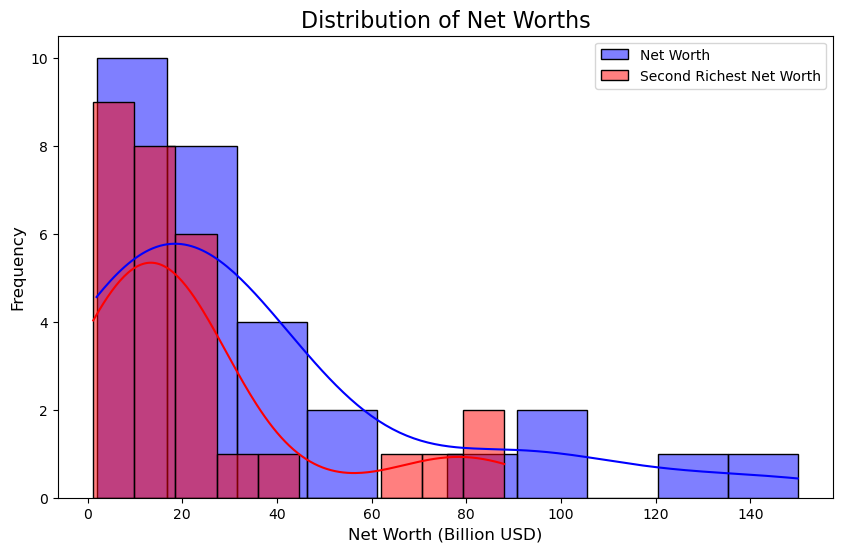

In [207]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NetWorth'], kde=True, color='blue', label='Net Worth', bins=10)
sns.histplot(df['SecondNetWorth'], kde=True, color='red', label='Second Richest Net Worth', bins=10)
plt.title('Distribution of Net Worths', fontsize=16)
plt.xlabel('Net Worth (Billion USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


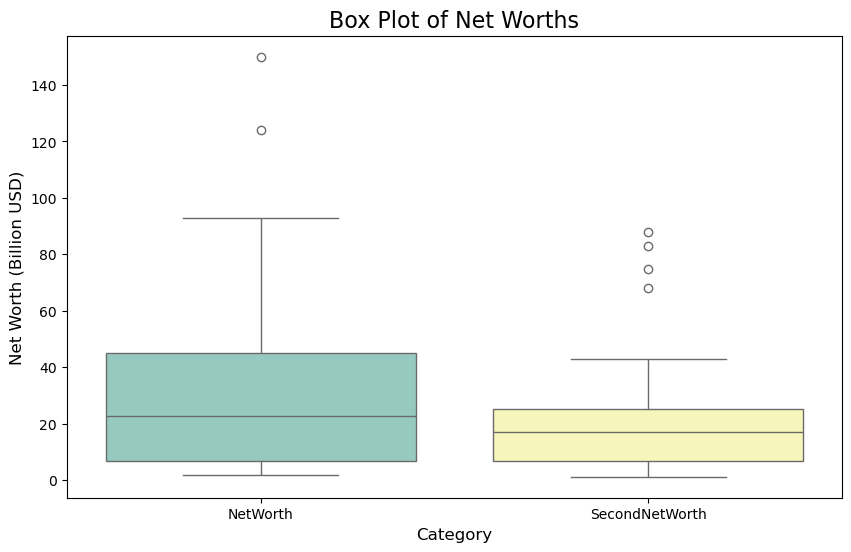

In [209]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['NetWorth', 'SecondNetWorth']], palette='Set3')
plt.title('Box Plot of Net Worths', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Net Worth (Billion USD)', fontsize=12)
plt.show()


NameError: name 'alt' is not defined

In [292]:
# Prepare the dataset for horizontal heatmap
horizontal_data = df[['Year', 'Richest', 'Net worth richest (billion USD)', 
                        'Second richest', 'Net worth second richest (billion USD)']]


KeyError: "['Net worth richest (billion USD)', 'Net worth second richest (billion USD)'] not in index"

In [296]:
def convert_to_numeric(value):
    try:
        if "billion" in value:
            return float(value.split()[0])
        return None
    except:
        return None

df['Net worth richest (billion USD)'] = df['Net worth in US$'].apply(convert_to_numeric)
df['Net worth second richest (billion USD)'] = df['Net worth in US$.1'].apply(convert_to_numeric)

KeyError: 'Net worth in US$'

In [302]:
file_path = "D:/big data project/Top_richest_new_updated.csv" # Update with your actual file path
data = pd.read_csv(file_path)
data

,Year,Richest,Net worth in US$,Second richest,Net worth in US$.1
0,2024,Mukesh Ambani,124 billion,Gautam Adani,83 billion
1,2023,Mukesh Ambani,92 billion,Gautam Adani,68 billion
2,2022,Gautam Adani,150 billion,Mukesh Ambani,88 billion
3,2021,Mukesh Ambani,92.7 billion,Gautam Adani,74.8 billion
4,2020,Mukesh Ambani,88.7 billion,Gautam Adani,25.2 billion
5,2019,Mukesh Ambani,51.4 billion,Gautam Adani,15.7 billion
6,2018,Mukesh Ambani,47.3 billion,Azim Premji,21 billion
7,2017,Mukesh Ambani,38 billion,Azim Premji,19 billion
8,2016,Mukesh Ambani,22.7 billion,Dilip Shanghvi,16.9 billion
9,2015,Mukesh Ambani,18.9 billion,Dilip Shanghvi,18 billion


In [308]:
# Convert net worth columns to numeric (in billions)
def convert_to_numeric(value):
    try:
        if "billion" in value:
            return float(value.split()[0])
        return None
    except:
        return None

data['Net worth richest (billion USD)'] = data['Net worth in US$'].apply(convert_to_numeric)
data['Net worth second richest (billion USD)'] = data['Net worth in US$.1'].apply(convert_to_numeric)



In [310]:
# Reshape the data for heatmap
horizontal_data_melted = data[['Year', 'Richest', 'Net worth richest (billion USD)', 
                               'Second richest', 'Net worth second richest (billion USD)']].melt(
    id_vars=['Year'],
    value_vars=['Richest', 'Second richest'],
    var_name='Rank',
    value_name='Name'
)
horizontal_data_melted['Net Worth (billion USD)'] = horizontal_data_melted.apply(
    lambda row: data.loc[data['Year'] == row['Year'], 
                         f"Net worth {'richest' if row['Rank'] == 'Richest' else 'second richest'} (billion USD)"].values[0], 
    axis=1
)


In [312]:
# Pivot for heatmap
heatmap_horizontal = horizontal_data_melted.pivot(index="Name", columns="Year", values="Net Worth (billion USD)")

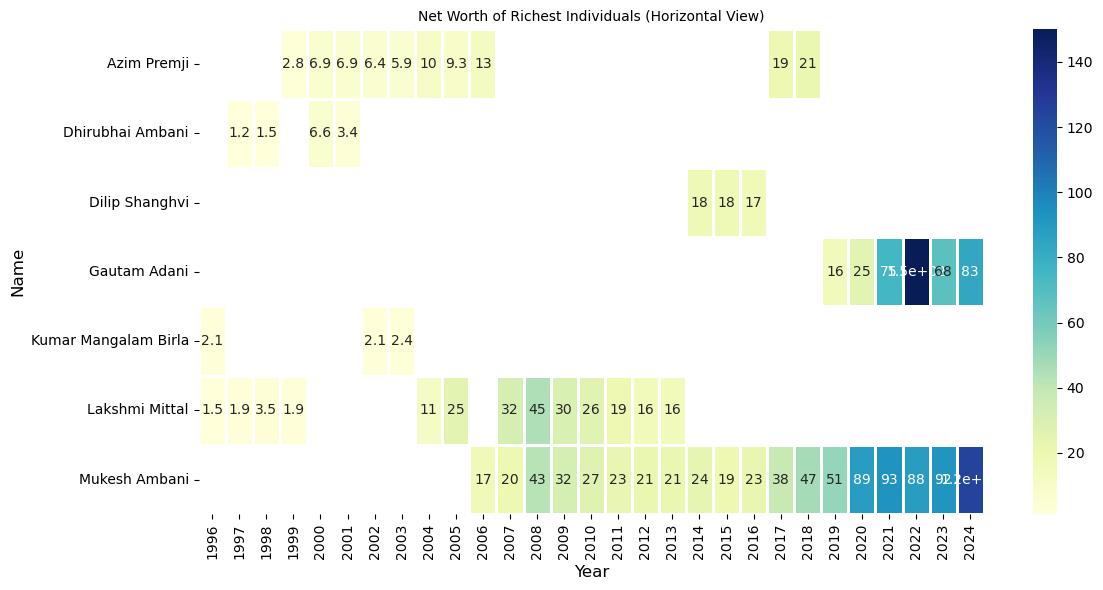

In [334]:
# Plot the horizontal heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_horizontal, annot=True, cmap="YlGnBu", linewidths=2, )
plt.title("Net Worth of Richest Individuals (Horizontal View)", fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Name", fontsize=12)
plt.tight_layout()
plt.show()